In [17]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from numpy.typing import NDArray

In [18]:
def interpolate(x_measure: NDArray, y_measure: NDArray, x_interpolate: NDArray, kernel: callable) -> NDArray:
    width = x_measure[1] - x_measure[0]
    kernels = np.asarray([kernel(x_interpolate, offset=offset, width=width) for offset in x_measure])

    return y_measure @kernels

In [19]:
def f1(x):
    return np.sin(x)

In [20]:
def sinc_kernel(x: NDArray, offset: float, width: float, alpha: float = np.inf) -> NDArray:
    x = x - offset
    x = x / width
    return (x >= -alpha) * (x < alpha) * np.sinc(x)

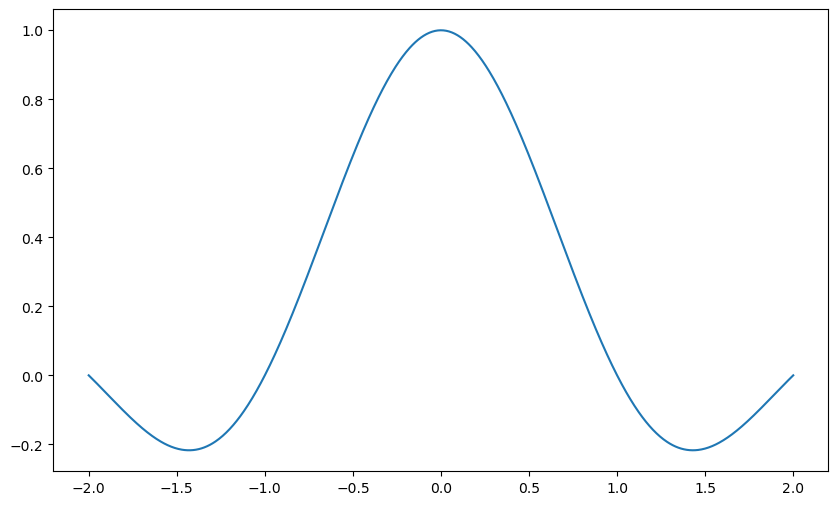

In [21]:
x = np.linspace(-2, 2, 1000)

_ = plt.figure(figsize=[10, 6])
_ = plt.plot(x, sinc_kernel(x, offset=0, width=1))

Mean Squared Error (MSE): 0.0021780218918326043


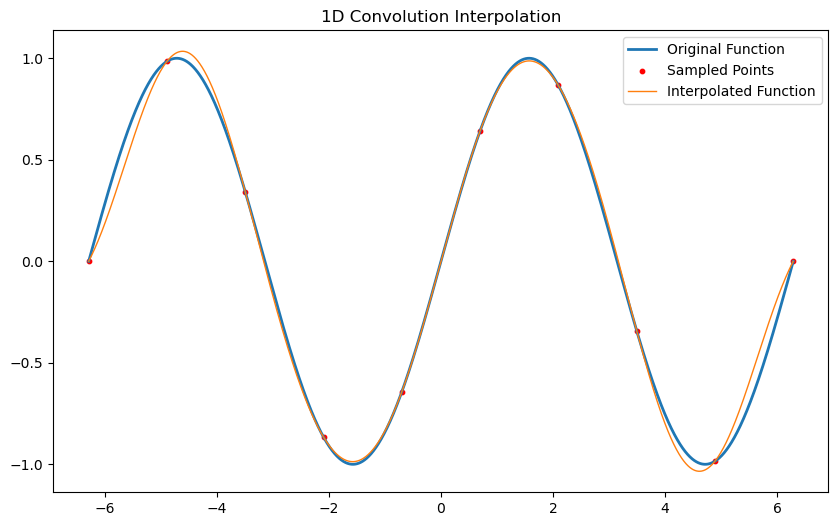

In [22]:
n_samples = 10

x = np.linspace(-2 * np.pi, 2 * np.pi, 10_000)
y = f1(x)

x_sampled = np.linspace(-2 * np.pi, 2 * np.pi, n_samples)
y_sampled = f1(x_sampled)

x_interp = np.linspace(- 2 * np.pi, 2*np.pi, 10_000)
y_interp = interpolate(x_measure=x_sampled, y_measure=y_sampled, x_interpolate=x_interp, kernel=sinc_kernel)

mse = mean_squared_error(y_interp, y)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Function', linewidth=2)
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points', s=10)
plt.plot(x_interp, y_interp, label='Interpolated Function', linewidth=1)
plt.title('1D Convolution Interpolation')
plt.legend()

plt.show()

Mean Squared Error (MSE): 0.0002632371511923619


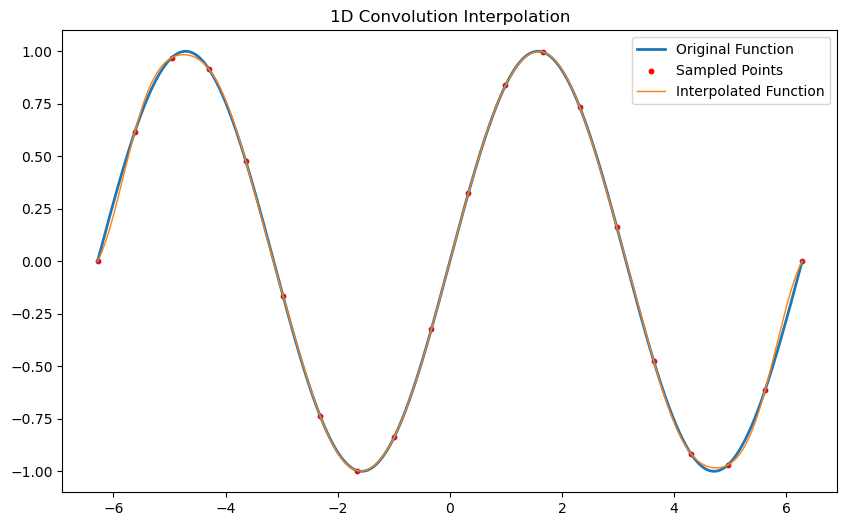

In [23]:
n_samples = 20

x = np.linspace(-2 * np.pi, 2 * np.pi, 10_000)
y = f1(x)

x_sampled = np.linspace(-2 * np.pi, 2 * np.pi, n_samples)
y_sampled = f1(x_sampled)

x_interp = np.linspace(- 2 * np.pi, 2*np.pi, 10_000)
y_interp = interpolate(x_measure=x_sampled, y_measure=y_sampled, x_interpolate=x_interp, kernel=sinc_kernel)

mse = mean_squared_error(y_interp, y)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Function', linewidth=2)
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points', s=10)
plt.plot(x_interp, y_interp, label='Interpolated Function', linewidth=1)
plt.title('1D Convolution Interpolation')
plt.legend()

plt.show()

Mean Squared Error (MSE): 3.3129004029260447e-05


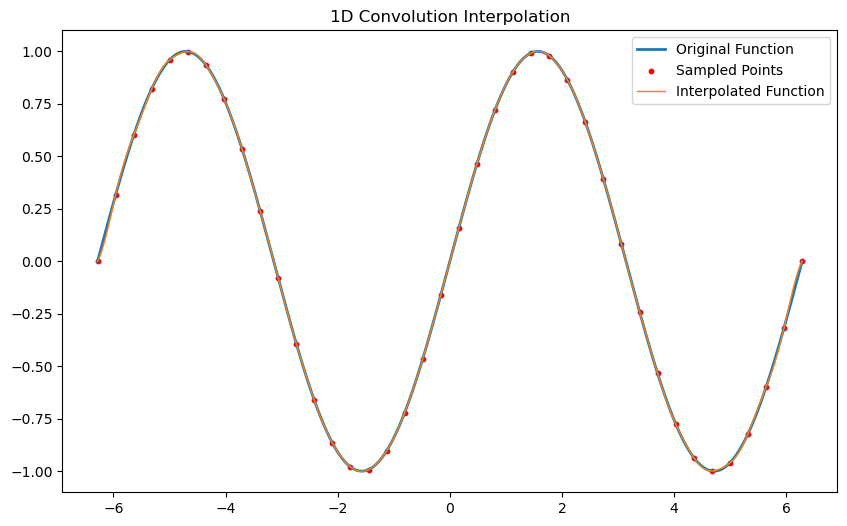

In [24]:
n_samples = 40

x = np.linspace(-2 * np.pi, 2 * np.pi, 10_000)
y = f1(x)

x_sampled = np.linspace(-2 * np.pi, 2 * np.pi, n_samples)
y_sampled = f1(x_sampled)

x_interp = np.linspace(- 2 * np.pi, 2*np.pi, 10_000)
y_interp = interpolate(x_measure=x_sampled, y_measure=y_sampled, x_interpolate=x_interp, kernel=sinc_kernel)

mse = mean_squared_error(y_interp, y)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Function', linewidth=2)
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points', s=10)
plt.plot(x_interp, y_interp, label='Interpolated Function', linewidth=1)
plt.title('1D Convolution Interpolation')
plt.legend()

plt.show()

Mean Squared Error (MSE): 2.157000158109672e-06


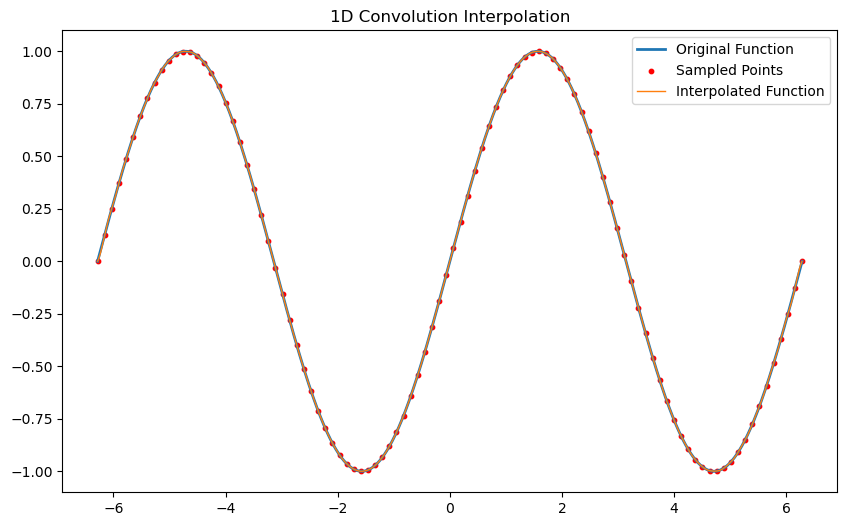

In [25]:
n_samples = 100

x = np.linspace(-2 * np.pi, 2 * np.pi, 10_000)
y = f1(x)

x_sampled = np.linspace(-2 * np.pi, 2 * np.pi, n_samples)
y_sampled = f1(x_sampled)

x_interp = np.linspace(- 2 * np.pi, 2*np.pi, 10_000)
y_interp = interpolate(x_measure=x_sampled, y_measure=y_sampled, x_interpolate=x_interp, kernel=sinc_kernel)

mse = mean_squared_error(y_interp, y)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Function', linewidth=2)
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points', s=10)
plt.plot(x_interp, y_interp, label='Interpolated Function', linewidth=1)
plt.title('1D Convolution Interpolation')
plt.legend()

plt.show()

In [26]:
def f2(x):
    return np.sin(np.power(x, -1))

In [27]:
def linear_kernel(x: NDArray, offset: float, width: float) -> NDArray:
    x = x - offset
    x = x / width
    return (1 - np.abs(x)) * (np.abs(x) < 1)

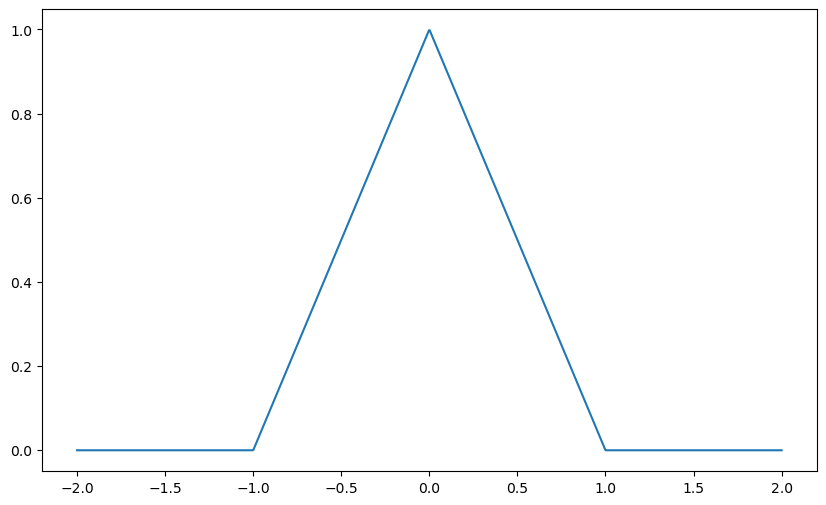

In [28]:
x = np.linspace(-2, 2, 1000)

_ = plt.figure(figsize=[10, 6])
_ = plt.plot(x, linear_kernel(x, offset=0, width=1))

Mean Squared Error (MSE): 0.03182624324409016


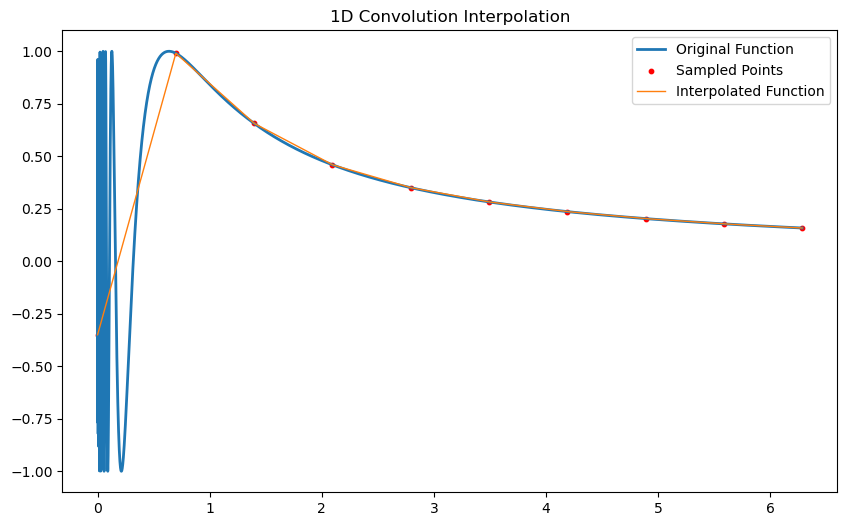

In [29]:
n_samples = 10

x = np.linspace(1e-6, 2 * np.pi, 10_000)
y = f2(x)

x_sampled = np.linspace(1e-6, 2 * np.pi, n_samples)
y_sampled = f2(x_sampled)

x_interp = np.linspace(1e-6, 2*np.pi, 10_000)
y_interp = interpolate(x_measure=x_sampled, y_measure=y_sampled, x_interpolate=x_interp, kernel=linear_kernel)

mse = mean_squared_error(y_interp, y)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Function', linewidth=2)
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points', s=10)
plt.plot(x_interp, y_interp, label='Interpolated Function', linewidth=1)
plt.title('1D Convolution Interpolation')
plt.legend()

plt.show()

Mean Squared Error (MSE): 0.02968324551878044


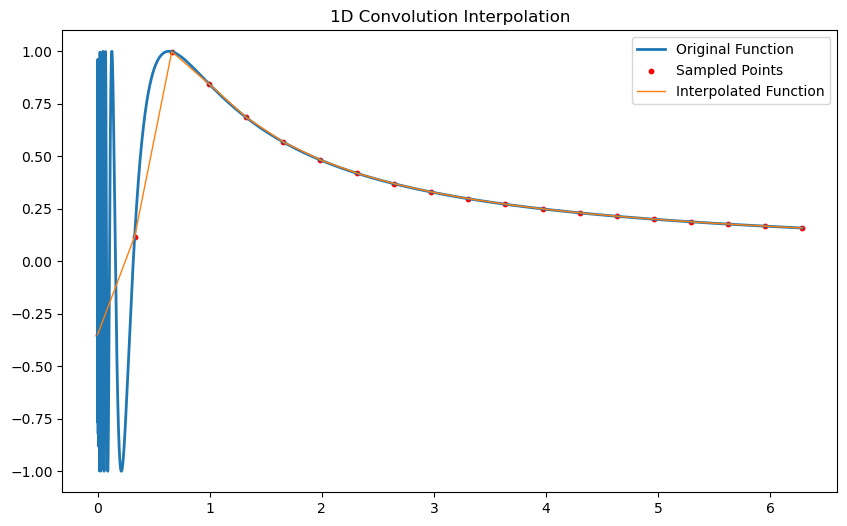

In [30]:
n_samples = 20

x = np.linspace(1e-6, 2 * np.pi, 10_000)
y = f2(x)

x_sampled = np.linspace(1e-6, 2 * np.pi, n_samples)
y_sampled = f2(x_sampled)

x_interp = np.linspace(1e-6, 2*np.pi, 10_000)
y_interp = interpolate(x_measure=x_sampled, y_measure=y_sampled, x_interpolate=x_interp, kernel=linear_kernel)

mse = mean_squared_error(y_interp, y)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Function', linewidth=2)
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points', s=10)
plt.plot(x_interp, y_interp, label='Interpolated Function', linewidth=1)
plt.title('1D Convolution Interpolation')
plt.legend()

plt.show()

Mean Squared Error (MSE): 0.025880647753248873


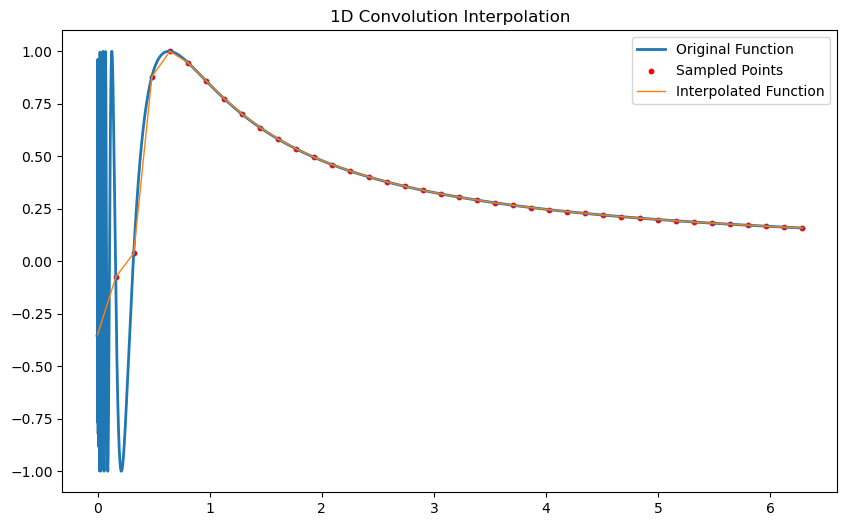

In [31]:
n_samples = 40

x = np.linspace(1e-6, 2 * np.pi, 10_000)
y = f2(x)

x_sampled = np.linspace(1e-6, 2 * np.pi, n_samples)
y_sampled = f2(x_sampled)

x_interp = np.linspace(1e-6, 2*np.pi, 10_000)
y_interp = interpolate(x_measure=x_sampled, y_measure=y_sampled, x_interpolate=x_interp, kernel=linear_kernel)

mse = mean_squared_error(y_interp, y)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Function', linewidth=2)
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points', s=10)
plt.plot(x_interp, y_interp, label='Interpolated Function', linewidth=1)
plt.title('1D Convolution Interpolation')
plt.legend()

plt.show()

Mean Squared Error (MSE): 0.012275841687673426


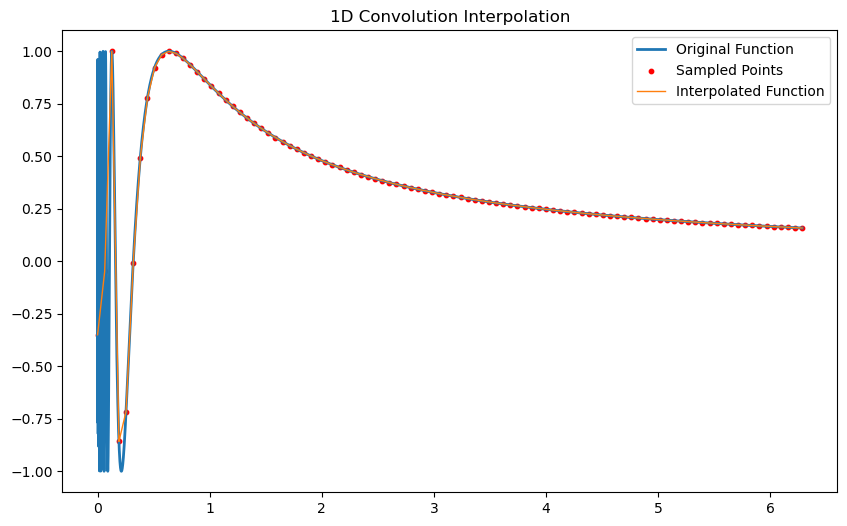

In [32]:
n_samples = 100

x = np.linspace(1e-6, 2 * np.pi, 10_000)
y = f2(x)

x_sampled = np.linspace(1e-6, 2 * np.pi, n_samples)
y_sampled = f2(x_sampled)

x_interp = np.linspace(1e-6, 2*np.pi, 10_000)
y_interp = interpolate(x_measure=x_sampled, y_measure=y_sampled, x_interpolate=x_interp, kernel=linear_kernel)

mse = mean_squared_error(y_interp, y)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Function', linewidth=2)
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points', s=10)
plt.plot(x_interp, y_interp, label='Interpolated Function', linewidth=1)
plt.title('1D Convolution Interpolation')
plt.legend()

plt.show()

In [33]:
def f3(x):
    return np.sign(np.sin(8*x))

In [34]:
def nearest_neighbour_kernel(x: NDArray, offset: float, width: float) -> NDArray:
    x = x - offset
    return (x >= (-1 * width / 2)) * (x < width / 2)

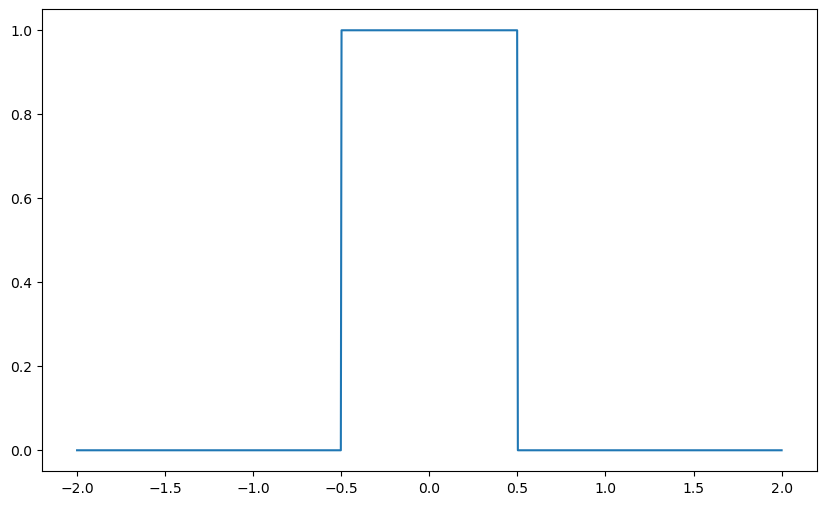

In [35]:
x = np.linspace(-2, 2, 1000)

_ = plt.figure(figsize=[10, 6])
_ = plt.plot(x, nearest_neighbour_kernel(x, offset=0, width=1))

Mean Squared Error (MSE): 0.6672


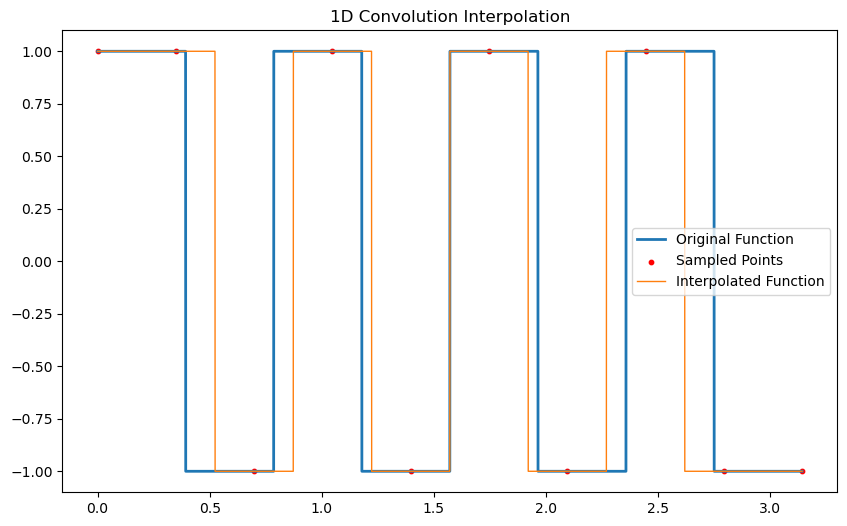

In [36]:
n_samples = 10

x = np.linspace(1e-6, np.pi, 10_000)
y = f3(x)

x_sampled = np.linspace(1e-6, np.pi, n_samples)
y_sampled = f3(x_sampled)

x_interp = np.linspace(1e-6, np.pi, 10_000)
y_interp = interpolate(x_measure=x_sampled, y_measure=y_sampled, x_interpolate=x_interp, kernel=nearest_neighbour_kernel)

mse = mean_squared_error(y_interp, y)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Function', linewidth=2)
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points', s=10)
plt.plot(x_interp, y_interp, label='Interpolated Function', linewidth=1)
plt.title('1D Convolution Interpolation')
plt.legend()
plt.show()

Mean Squared Error (MSE): 0.3152


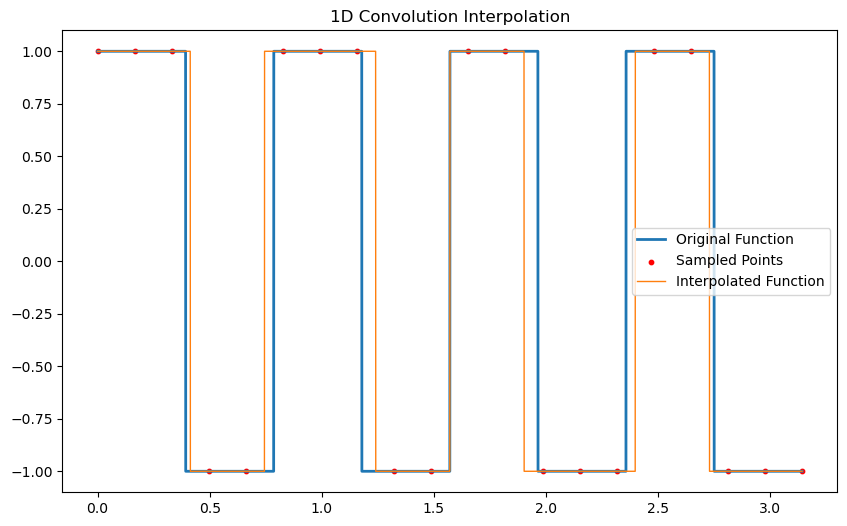

In [37]:
n_samples = 20

x = np.linspace(1e-6, np.pi, 10_000)
y = f3(x)

x_sampled = np.linspace(1e-6, np.pi, n_samples)
y_sampled = f3(x_sampled)

x_interp = np.linspace(1e-6, np.pi, 10_000)
y_interp = interpolate(x_measure=x_sampled, y_measure=y_sampled, x_interpolate=x_interp, kernel=nearest_neighbour_kernel)

mse = mean_squared_error(y_interp, y)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Function', linewidth=2)
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points', s=10)
plt.plot(x_interp, y_interp, label='Interpolated Function', linewidth=1)
plt.title('1D Convolution Interpolation')
plt.legend()
plt.show()

Mean Squared Error (MSE): 0.1536


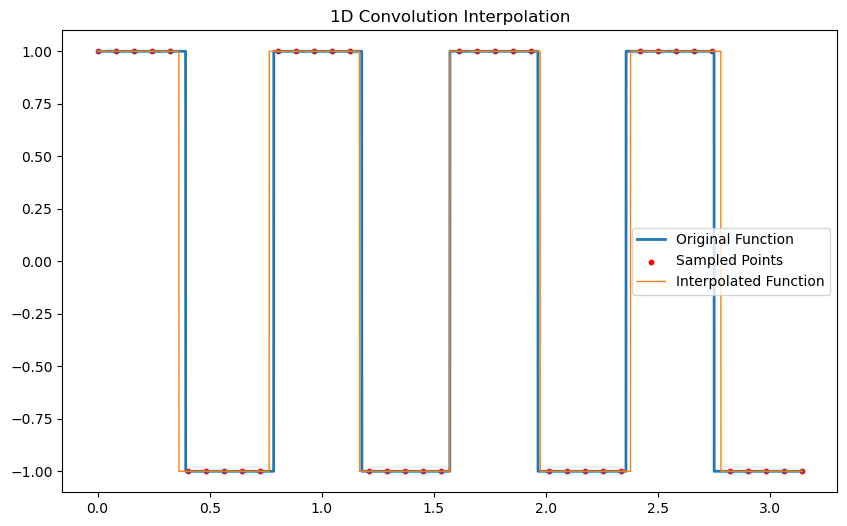

In [38]:
n_samples = 40

x = np.linspace(1e-6, np.pi, 10_000)
y = f3(x)

x_sampled = np.linspace(1e-6, np.pi, n_samples)
y_sampled = f3(x_sampled)

x_interp = np.linspace(1e-6, np.pi, 10_000)
y_interp = interpolate(x_measure=x_sampled, y_measure=y_sampled, x_interpolate=x_interp, kernel=nearest_neighbour_kernel)

mse = mean_squared_error(y_interp, y)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Function', linewidth=2)
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points', s=10)
plt.plot(x_interp, y_interp, label='Interpolated Function', linewidth=1)
plt.title('1D Convolution Interpolation')
plt.legend()
plt.show()

Mean Squared Error (MSE): 0.0608


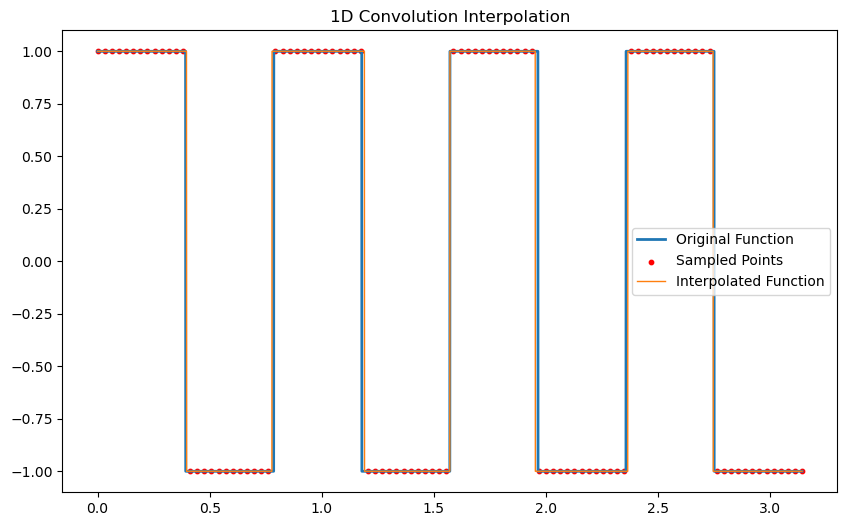

In [39]:
n_samples = 100

x = np.linspace(1e-6, np.pi, 10_000)
y = f3(x)

x_sampled = np.linspace(1e-6, np.pi, n_samples)
y_sampled = f3(x_sampled)

x_interp = np.linspace(1e-6, np.pi, 10_000)
y_interp = interpolate(x_measure=x_sampled, y_measure=y_sampled, x_interpolate=x_interp, kernel=nearest_neighbour_kernel)

mse = mean_squared_error(y_interp, y)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Function', linewidth=2)
plt.scatter(x_sampled, y_sampled, color='red', label='Sampled Points', s=10)
plt.plot(x_interp, y_interp, label='Interpolated Function', linewidth=1)
plt.title('1D Convolution Interpolation')
plt.legend()
plt.show()